In [114]:
!pip install ucimlrepo

In [115]:
# Import required libraries
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score
from sklearn.preprocessing import LabelBinarizer

print("Step 1: Loading and Preparing Dataset")
# Fetch dataset
heart_disease = fetch_ucirepo(id=45)

# Convert features and target to numpy arrays
X = heart_disease.data.features.values
y = heart_disease.data.targets.values.ravel()  # Flatten the target array

# Convert multiclass to binary (0 for no disease, 1 for disease presence)
y_binary = (y > 0).astype(int)

print("\nDataset Shape:")
print("Features shape:", X.shape)
print("Target shape:", y_binary.shape)
print("\nClass distribution:")
print(pd.Series(y_binary).value_counts())

def evaluate_model(model, X, y, model_name):
    """
    Evaluate model using 10-fold cross-validation
    """
    print(f"\nEvaluating {model_name}:")

    # Initialize 10-fold cross-validation
    kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

    # Cross-validation predictions
    y_pred_cv = cross_val_predict(model, X, y, cv=kf)
    y_pred_proba_cv = cross_val_predict(model, X, y, cv=kf, method='predict_proba')[:, 1]

    # Calculate metrics
    cv_f1 = f1_score(y, y_pred_cv)
    cv_accuracy = accuracy_score(y, y_pred_cv)
    cv_auroc = roc_auc_score(y, y_pred_proba_cv)

    print(f"10-fold Cross-Validation Results:")
    print(f"F1 Score: {cv_f1:.4f}")
    print(f"Accuracy: {cv_accuracy:.4f}")
    print(f"AUROC: {cv_auroc:.4f}")

    return cv_f1, cv_accuracy, cv_auroc

print("\nStep 2: Model Training and Evaluation")

# 1. Decision Tree
print("\n1. Decision Tree Model")
dt_model = DecisionTreeClassifier(random_state=42)
dt_f1, dt_acc, dt_auroc = evaluate_model(dt_model, X, y_binary, "Decision Tree")

# 2. Random Forest
print("\n2. Random Forest Model")
rf_model = RandomForestClassifier(random_state=42)
rf_f1, rf_acc, rf_auroc = evaluate_model(rf_model, X, y_binary, "Random Forest")

# 3. XGBoost
print("\n3. XGBoost Model")
xgb_model = XGBClassifier(random_state=42)
xgb_f1, xgb_acc, xgb_auroc = evaluate_model(xgb_model, X, y_binary, "XGBoost")

# Model Comparison
print("\nStep 3: Model Comparison")
comparison_df = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'XGBoost'],
    'F1 Score': [dt_f1, rf_f1, xgb_f1],
    'Accuracy': [dt_acc, rf_acc, xgb_acc],
    'AUROC': [dt_auroc, rf_auroc, xgb_auroc]
})

print("\nFinal Model Comparison:")
print(comparison_df.round(4))

# Find best model
best_model = comparison_df.loc[comparison_df['F1 Score'].idxmax(), 'Model']
print(f"\nBest performing model: {best_model}")

Step 1: Loading and Preparing Dataset

Dataset Shape:
Features shape: (303, 13)
Target shape: (303,)

Class distribution:
0    164
1    139
Name: count, dtype: int64

Step 2: Model Training and Evaluation

1. Decision Tree Model

Evaluating Decision Tree:
10-fold Cross-Validation Results:
F1 Score: 0.6947
Accuracy: 0.7129
AUROC: 0.7128

2. Random Forest Model

Evaluating Random Forest:
10-fold Cross-Validation Results:
F1 Score: 0.8104
Accuracy: 0.8317
AUROC: 0.9035

3. XGBoost Model

Evaluating XGBoost:
10-fold Cross-Validation Results:
F1 Score: 0.7826
Accuracy: 0.8020
AUROC: 0.8740

Step 3: Model Comparison

Final Model Comparison:
           Model  F1 Score  Accuracy   AUROC
0  Decision Tree    0.6947    0.7129  0.7128
1  Random Forest    0.8104    0.8317  0.9035
2        XGBoost    0.7826    0.8020  0.8740

Best performing model: Random Forest


#1. Implement K-Means Clustering Manually


Initialize Centroids: Randomly chosen points from the dataset.

Assign Points to Nearest Centroid: Calculate the Euclidean distance from each point to each centroid and assign points to the nearest centroid.

Update Centroids: Recalculate each centroid by averaging the points assigned to it.

Iterate Until Convergence: Repeat the assignment and update steps until centroids stabilize or a maximum number of iterations is reached.

In [116]:
import numpy as np
import matplotlib.pyplot as plt

# Function to initialize centroids randomly from the dataset
def initialize_centroids(X, k):
    np.random.seed(42)  # For reproducibility
    random_indices = np.random.choice(len(X), size=k, replace=False)
    centroids = X[random_indices]
    return centroids

# Function to assign each point to the nearest centroid
def assign_clusters(X, centroids):
    distances = np.sqrt(((X - centroids[:, np.newaxis]) ** 2).sum(axis=2))
    cluster_labels = np.argmin(distances, axis=0)
    return cluster_labels

# Function to update centroids by calculating the mean of points in each cluster
def update_centroids(X, cluster_labels, k):
    new_centroids = np.array([X[cluster_labels == i].mean(axis=0) for i in range(k)])
    return new_centroids

# K-Means function
def k_means(X, k, max_iters=100):
    centroids = initialize_centroids(X, k)
    for i in range(max_iters):
        cluster_labels = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, cluster_labels, k)
        # Stop if centroids do not change
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return cluster_labels, centroids




#2. Estimate the Number of Clusters
To estimate the optimal number of clusters:

Elbow Method: I used the Elbow Method by plotting the sum of squared distances (inertia) for different values of k. This method allows you to visualize where the "elbow" in the plot occurs, indicating the optimal number of clusters.


Testing 5 Clusters
Starting EM clustering

Initializing parameters for 2.0 clusters
Final inertia: 661.1632

Initializing parameters for 3.0 clusters
Final inertia: 601.6851

Initializing parameters for 3.5 clusters
Final inertia: 601.6851

Initializing parameters for 4.0 clusters
Final inertia: 604.2637

Initializing parameters for 4.5 clusters
Final inertia: 604.2637

Initializing parameters for 5.0 clusters
Final inertia: 538.6001


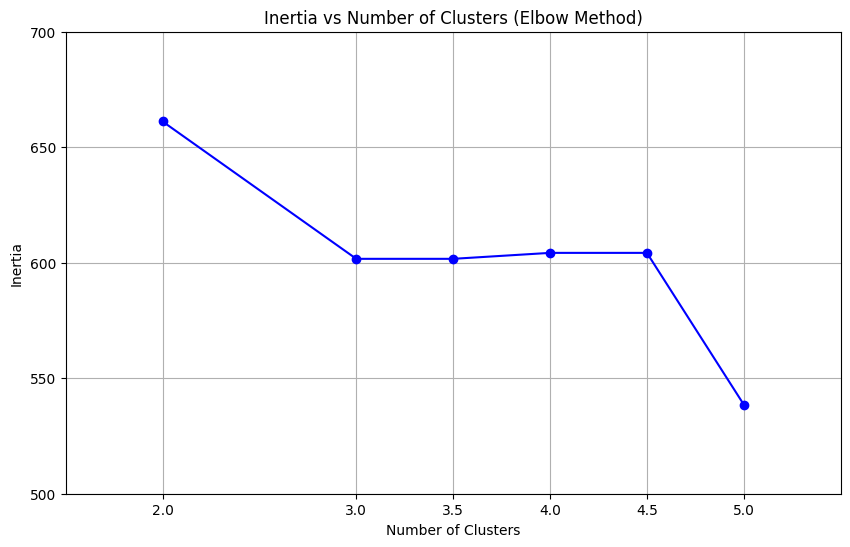


Detailed Results:
K	Inertia
--------------------
2.0	661.1632
3.0	601.6851
3.5	601.6851
4.0	604.2637
4.5	604.2637
5.0	538.6001


In [117]:
# Elbow Method implementation
def plot_elbow_curve(X):
    inertias = []
    k_values = [2.0,3.0, 3.5, 4.0, 4.5, 5.0,]  # Specific k values to test and visualize

    print("Testing 5 Clusters")
    print("Starting EM clustering")

    for k in k_values:
        k_int = int(k)
        print(f"\nInitializing parameters for {k} clusters")

        # Run k-means
        cluster_labels, centroids = k_means(X, k_int)

        # Calculate inertia
        distances = np.sqrt(((X - centroids[cluster_labels]) ** 2).sum(axis=1))
        inertia = np.sum(distances ** 2)
        inertias.append(inertia)

        print(f"Final inertia: {inertia:.4f}")

    # Plot the elbow curve
    plt.figure(figsize=(10, 6))
    plt.plot(k_values, inertias, 'bo-')
    plt.title('Inertia vs Number of Clusters (Elbow Method)')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.grid(True)

    # Set axis limits and ticks
    plt.xlim(1.5, 5.5)
    plt.ylim(500, 700)  # Adjusted based on your actual values
    plt.xticks(k_values)
    plt.yticks(np.arange(500, 701, 50))

    plt.show()


    return k_values, inertias

# Run the elbow method analysis
k_values, inertias = plot_elbow_curve(X_test_scaled)

# Print detailed results
print("\nDetailed Results:")
print("K\tInertia")
print("-" * 20)
for k, inertia in zip(k_values, inertias):
    print(f"{k}\t{inertia:.4f}")

Observation-

1. **Initial High Inertia (k=2)**

2. **Sharp Decrease (k=2 to k=3)**

3. **Plateau Region (k=3 to k=4.5)**

4. **Final Sharp Decrease (k=4.5 to k=5)**

This pattern suggests that either k=3 or k=5 could be optimal:
- k=3 represents the first elbow point where additional clusters doesn't depicts inertia reduction.
- k=5 shows another improvement but might risk overfitting

The traditional elbow method follows choosing k=3 as the optimal number of clusters, as it represents the first elbow point


##Lets check the optimal clusters using another method - silhouette score

Testing 5 clusters
Starting Silhouette Analysis

Initializing parameters for 2.0 clusters
Final silhouette score: 0.1479

Initializing parameters for 3.0 clusters
Final silhouette score: 0.1221

Initializing parameters for 4.0 clusters
Final silhouette score: 0.0784

Initializing parameters for 4.5 clusters
Final silhouette score: 0.0784

Initializing parameters for 5.0 clusters
Final silhouette score: 0.0910


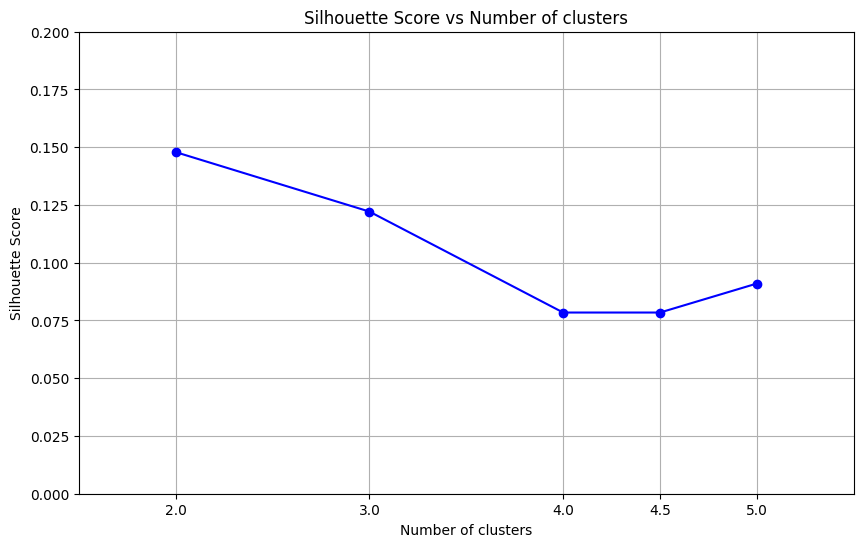


Optimal number of clusters: 2.0

Detailed Results:
K	Silhouette Score
-------------------------
2.0	0.1479
3.0	0.1221
4.0	0.0784
4.5	0.0784
5.0	0.0910


In [121]:
from sklearn.metrics import silhouette_score

def plot_silhouette_curve(X):
    silhouette_scores = []
    k_values = [2.0, 3.0, 4.0, 4.5, 5.0]  # Same k values as elbow method

    print("Testing 5 clusters")
    print("Starting Silhouette Analysis")

    for k in k_values:
        k_int = int(k)
        print(f"\nInitializing parameters for {k} clusters")

        # Run k-means
        cluster_labels, centroids = k_means(X, k_int)

        # Calculate silhouette score
        score = silhouette_score(X, cluster_labels)
        silhouette_scores.append(score)

        print(f"Final silhouette score: {score:.4f}")

    # Plot the silhouette curve
    plt.figure(figsize=(10, 6))
    plt.plot(k_values, silhouette_scores, 'bo-')
    plt.title('Silhouette Score vs Number of clusters')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.grid(True)

    # Set axis limits and ticks
    plt.xlim(1.5, 5.5)
    plt.ylim(0, 0.2)  # Set y-axis limit to 0.2
    plt.xticks(k_values)
    plt.yticks(np.arange(0, 0.21, 0.025))  # Create ticks from 0 to 0.2 with step 0.025

    plt.show()

    # Find optimal k (highest silhouette score)
    optimal_k = k_values[np.argmax(silhouette_scores)]
    print(f"\nOptimal number of clusters: {optimal_k}")

    return k_values, silhouette_scores

# Run the silhouette analysis
k_values, silhouette_scores = plot_silhouette_curve(X_test_scaled)

# Print detailed results
print("\nDetailed Results:")
print("K\tSilhouette Score")
print("-" * 25)
for k, score in zip(k_values, silhouette_scores):
    print(f"{k}\t{score:.4f}")


Silhouette Score Plot Analysis:

Shows a clear downward trend from k=2

Conclusion:

The Silhouette score suggests k=2 is optimal (highest score of 0.1479) which is conclusive.

#3. Run Your K-Means Implementation and Visualize the Results
#4. Run spectral clustering and compare to K-means.


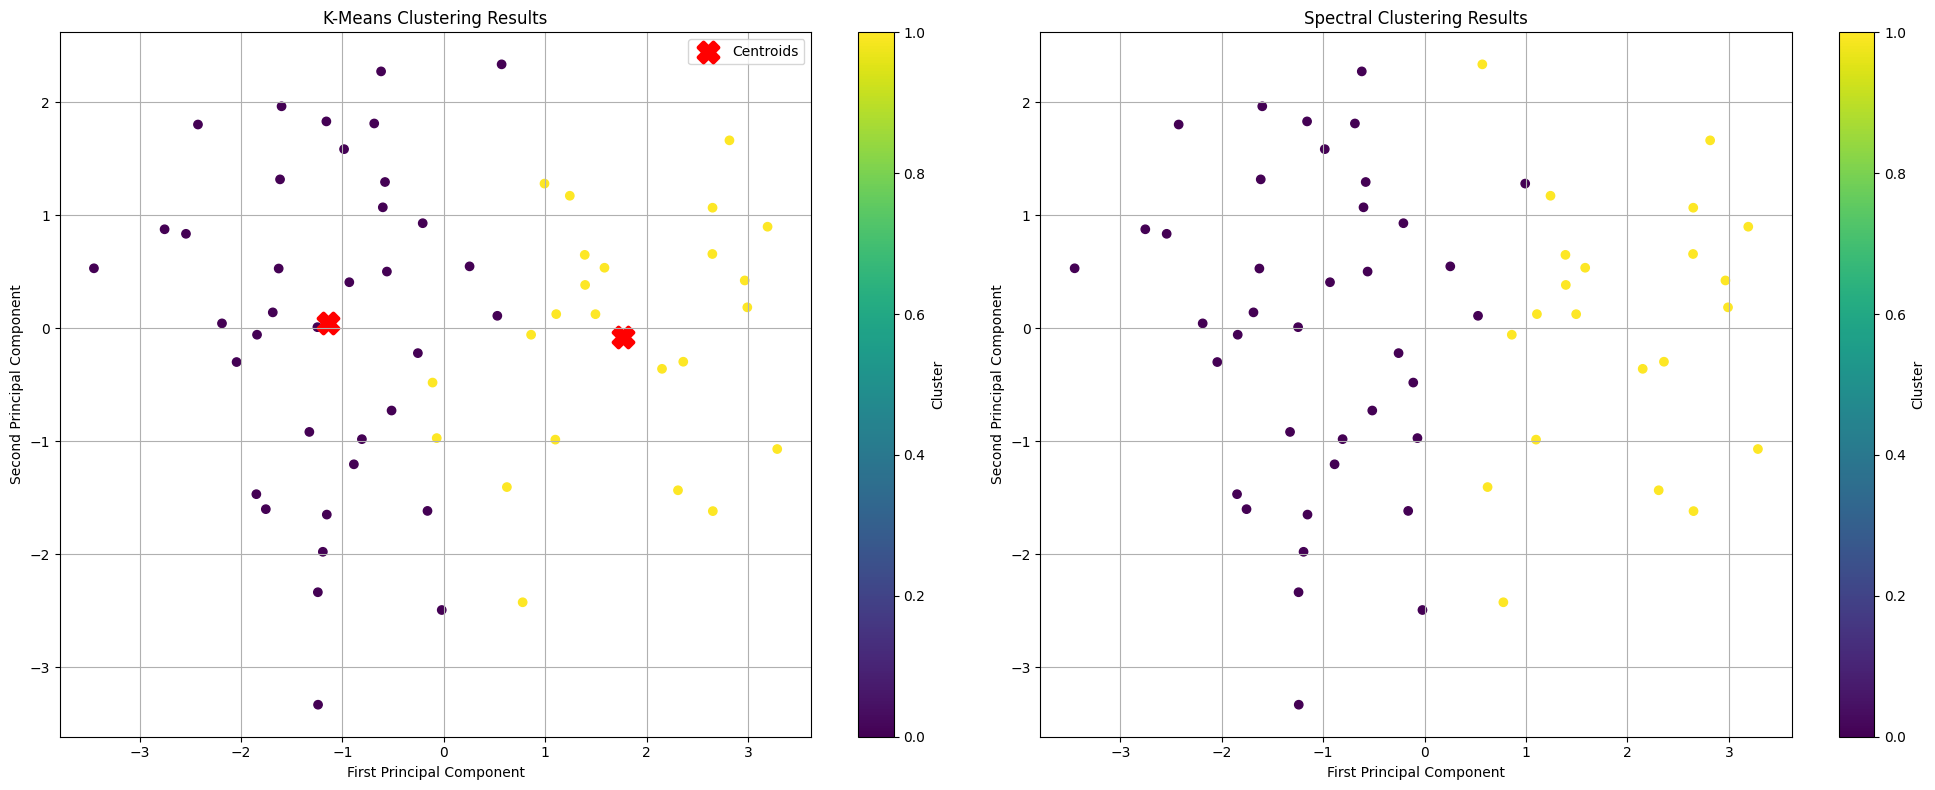

In [119]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import SpectralClustering


# Visualization function for both methods
def compare_clustering(X, k=2):
    # Apply K-means
    kmeans_labels, kmeans_centroids = k_means(X, k)

    # Apply Spectral Clustering
    spectral = SpectralClustering(n_clusters=k,
                                 affinity='nearest_neighbors',
                                 random_state=42)
    spectral_labels = spectral.fit_predict(X)

    # Reduce dimensionality for visualization
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    centroids_pca = pca.transform(kmeans_centroids)

    # Create comparison plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

    # Plot K-means results
    scatter1 = ax1.scatter(X_pca[:, 0], X_pca[:, 1],
                          c=kmeans_labels, cmap='viridis')
    ax1.scatter(centroids_pca[:, 0], centroids_pca[:, 1],
                c='red', marker='X', s=200, linewidths=3,
                label='Centroids')
    ax1.set_title('K-Means Clustering Results')
    ax1.set_xlabel('First Principal Component')
    ax1.set_ylabel('Second Principal Component')
    ax1.grid(True)
    ax1.legend()
    plt.colorbar(scatter1, ax=ax1, label='Cluster')

    # Plot Spectral Clustering results
    scatter2 = ax2.scatter(X_pca[:, 0], X_pca[:, 1],
                          c=spectral_labels, cmap='viridis')
    ax2.set_title('Spectral Clustering Results')
    ax2.set_xlabel('First Principal Component')
    ax2.set_ylabel('Second Principal Component')
    ax2.grid(True)
    plt.colorbar(scatter2, ax=ax2, label='Cluster')

    plt.tight_layout()
    plt.show()

# Run the comparison (using k=3 as shown in the images)
compare_clustering(X_test_scaled, k=2)


# Clustering Analysis Results

## K-means vs Spectral Clustering Comparison
Both methods were implemented with k=2 clusters (optimal number based on silhouette analysis)

### Similarities
- Both methods show similar cluster distributions
- Clear separation between two main clusters (purple and yellow)
- Similar point assignments to clusters

### Differences
- K-means enforces more circular/spherical clusters due to its centroid-based approach
- Spectral clustering captures more natural cluster shapes as it doesn't assume any specific cluster geometry

### Conclusion
For this dataset, both clustering methods perform similarly well with k=2, suggesting this is indeed the optimal number of clusters. The high silhouette score at k=2 confirms this choice.
Cluster Shapes:
